   ## CROP YIELD RECOMMENDATION SYSTEM

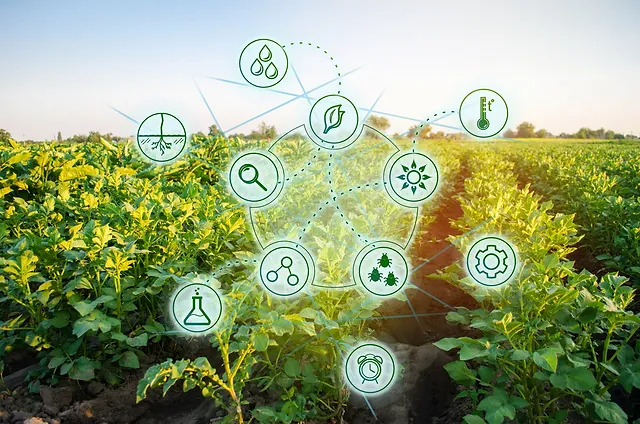

## Objective  :

### A crop recommendation system predicts the most suitable crops by analyzing soil parameters (such as pH, Nitrogen, Phosphate, and Potassium) and atmospheric conditions (such as rainfall and temperature). This data-driven approach assists farmers in making informed planting decisions.


## Importing imp libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

## Importing Dataset

In [2]:
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\Crop_recommendation.csv")

In [3]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


## Feature Names

## EDA

In [4]:
df.shape

(2200, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


### Checking null values

In [6]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

### Checking duplicated values

In [7]:
df.duplicated().sum()

0

In [8]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [9]:
df['label'].value_counts(normalize=True)

label
rice           0.045455
maize          0.045455
jute           0.045455
cotton         0.045455
coconut        0.045455
papaya         0.045455
orange         0.045455
apple          0.045455
muskmelon      0.045455
watermelon     0.045455
grapes         0.045455
mango          0.045455
banana         0.045455
pomegranate    0.045455
lentil         0.045455
blackgram      0.045455
mungbean       0.045455
mothbeans      0.045455
pigeonpeas     0.045455
kidneybeans    0.045455
chickpea       0.045455
coffee         0.045455
Name: proportion, dtype: float64

## Checking is the Dataset is  balanced or not

#### Lets check our dataset is balenced or imbalenced dataset. 🧐

<Axes: xlabel='count', ylabel='label'>

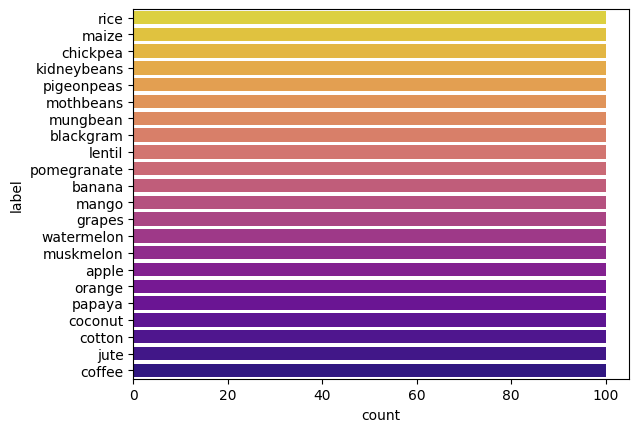

In [10]:
sns.countplot(y='label',data=df, palette="plasma_r")

#### Our dataset is balanced


### Humidity and rainfall

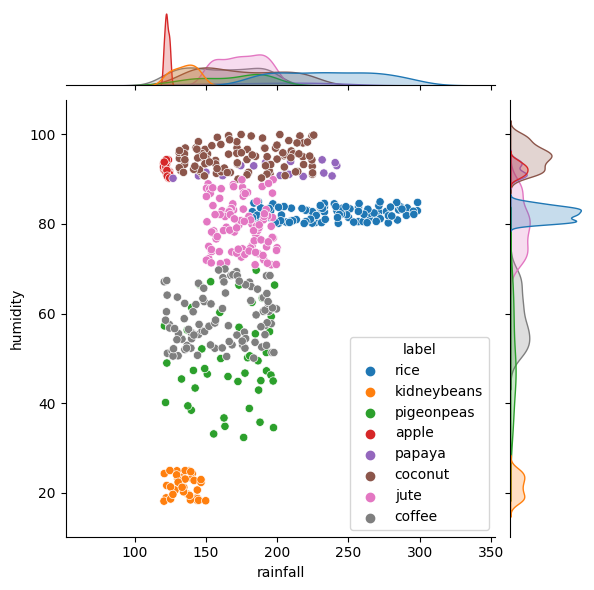

In [11]:
sns.jointplot(x="rainfall",y="humidity",data=df[(df['temperature']<30) & (df['rainfall']>120)],hue="label")

### 🔎 Rain affects soil moisture which affects ph of the soil. Here are the crops which are likely to be planted during this season.

###  🌱 Rice needs heavy rainfall (>200 mm) and a humidity above 80%. No wonder major rice production in India comes from East Coasts which has average of 220 mm rainfall every year!

### 🌴Coconut is a tropical crop and needs high humidity therefore explaining massive exports from coastal areas around the country.

### K and N

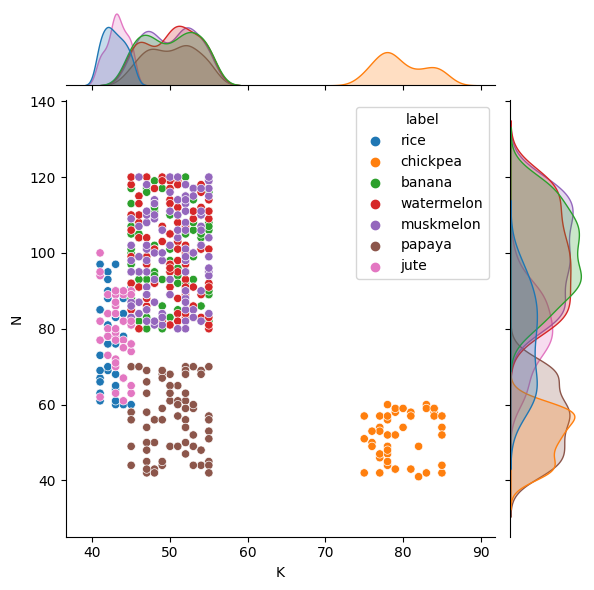

In [12]:
sns.jointplot(x="K",y="N",data=df[(df['N']>40)&(df['K']>40)],hue="label")

#### The nutritional quality of food is directly influenced by soil composition. Fruits that are rich in nutrients often exhibit stable potassium levels.

### humidity and  K` (potassium levels in the soil.)

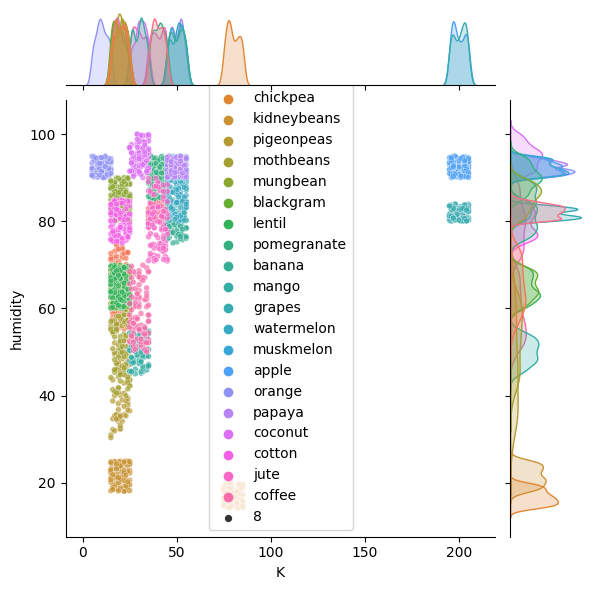

In [13]:
sns.jointplot(x="K",y="humidity",data=df,hue='label',size=8,s=30,alpha=0.7)

#### sns.jointplot() can be used for bivariate analysis to plot between humidity and K levels based on Label type. It further generates frequency distribution of classes with respect to features

## crops and ph 

<Axes: xlabel='ph', ylabel='label'>

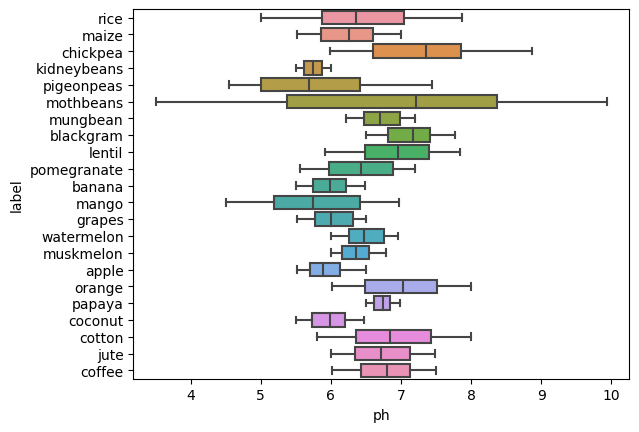

In [14]:
sns.boxplot(y='label',x='ph',data=df)

#### We can see ph values are critical when it comes to soil. A stability between 6 and 7 is preffered

<Axes: xlabel='K', ylabel='rainfall'>

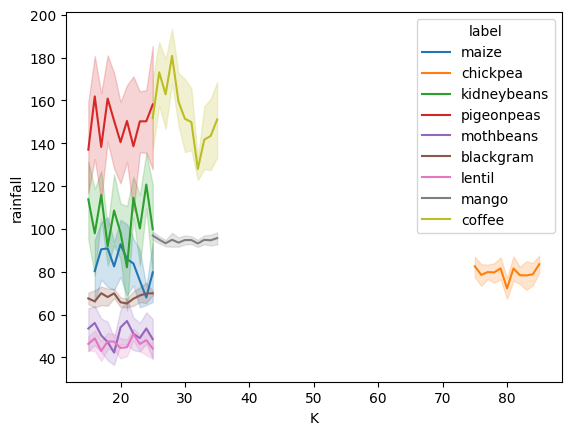

In [39]:
sns.lineplot(data = df[(df['humidity']<65)], x = "K", y = "rainfall",hue="label")

#### When humidity is less than 65, almost same phosphor levels(approx 14 to 25) are required for 6 crops which could be grown just based on the amount of rain expected over the next few weeks.

## Outlier 

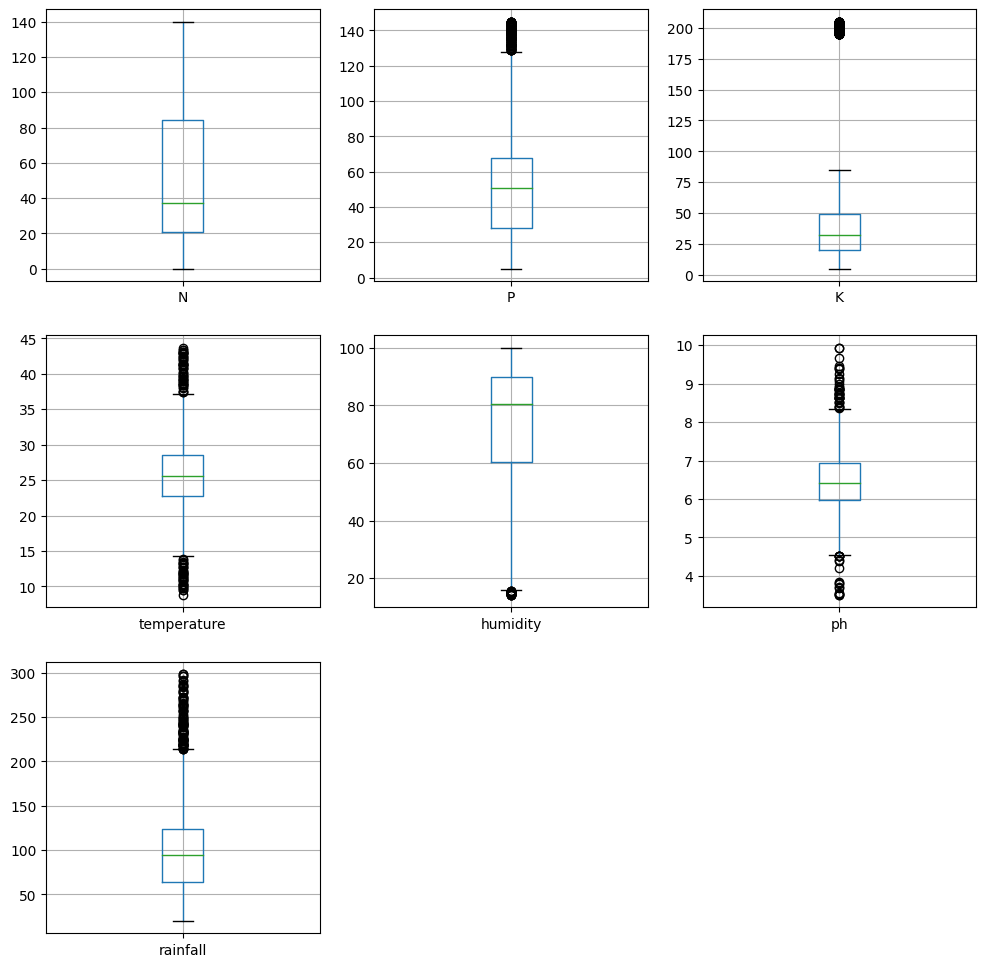

In [15]:
plt.figure(figsize=(12,12))
i=1
for col in df.iloc[:,:-1]:
    plt.subplot(3,3,i)
    df[[col]].boxplot()
    i+=1

In [16]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

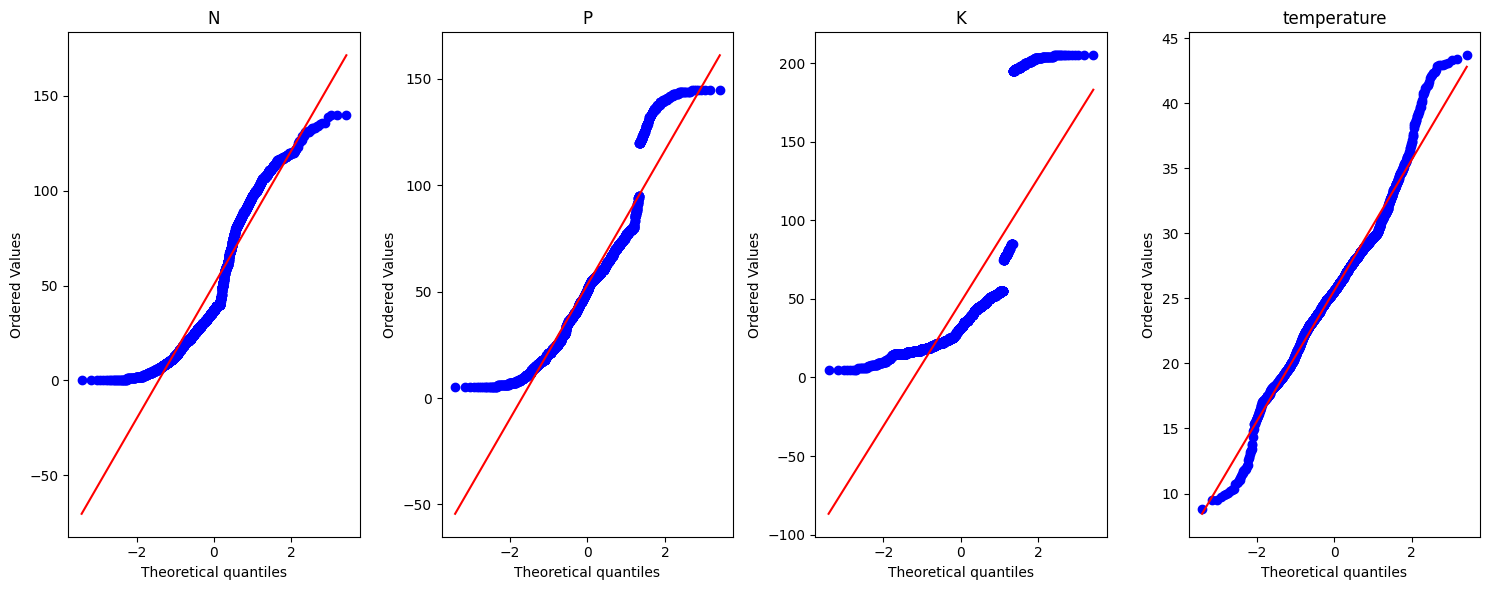

In [17]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 4, 1)
st.probplot(df['N'],plot  = plt)
plt.title('N')

plt.subplot(1, 4, 2)
st.probplot(df['P'],plot  = plt)
plt.title('P')

plt.subplot(1, 4, 3)
st.probplot(df['K'],plot  = plt)
plt.title('K')

plt.subplot(1,4,4)
st.probplot(df['temperature'],plot  = plt)
plt.title('temperature')

plt.tight_layout()
plt.show()

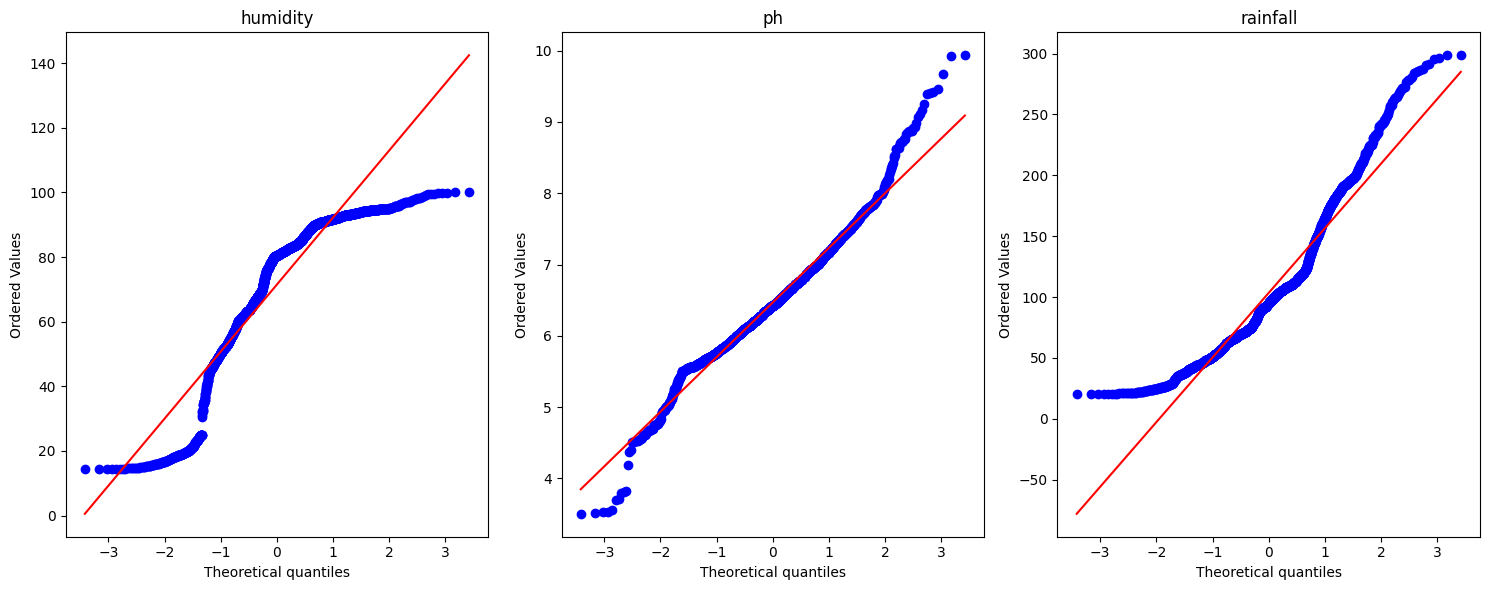

In [18]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
st.probplot(df['humidity'],plot  = plt)
plt.title('humidity')

plt.subplot(1, 3, 2)
st.probplot(df['ph'],plot  = plt)
plt.title('ph')

plt.subplot(1, 3, 3)
st.probplot(df['rainfall'],plot  = plt)
plt.title('rainfall')

plt.tight_layout()
plt.show()

## Distribution

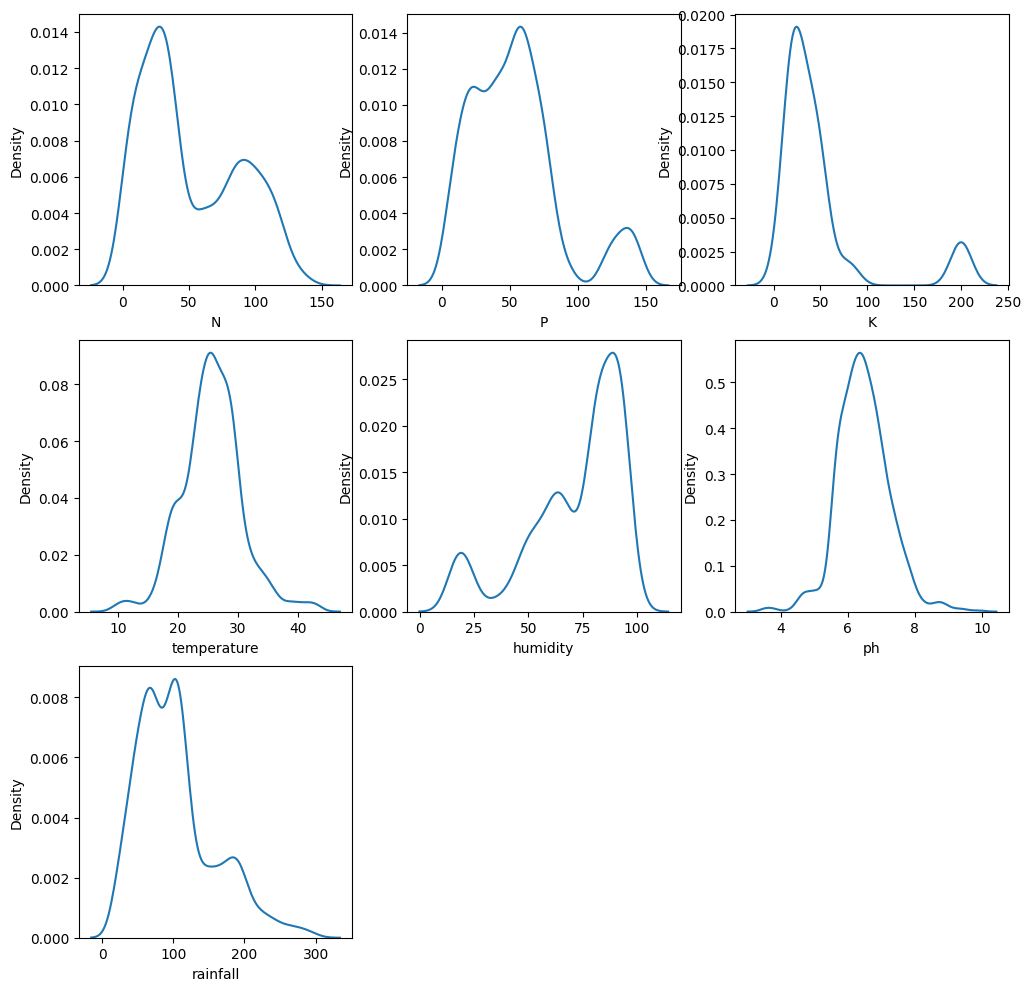

In [19]:
plt.figure(figsize=(12,12))
i=1
for col in df.iloc[:,:-1]:
    plt.subplot(3,3,i)
    sns.kdeplot(df[col])
    i+=1

<Axes: >

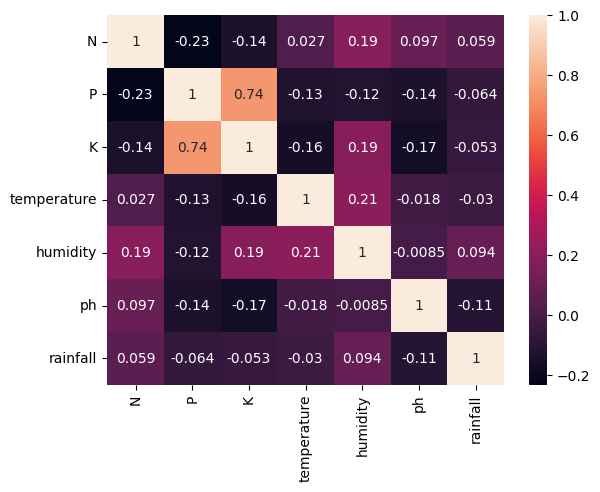

In [20]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [21]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [22]:
df['label'].nunique()

22

In [23]:
df.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [24]:
crop_dict = {
    'rice': 0,
    'maize': 1,
    'jute': 2,
    'cotton': 3,
    'coconut': 4,
    'papaya': 5,
    'orange': 6,
    'apple': 7,
    'muskmelon': 8,
    'watermelon': 9,
    'grapes': 10,
    'mango': 11,
    'banana': 12,
    'pomegranate': 13,
    'lentil': 14,
    'blackgram': 15,
    'mungbean': 16,
    'mothbeans': 17,
    'pigeonpeas': 18,
    'kidneybeans': 19,
    'chickpea': 20,
    'coffee': 21
}
df['crop_num']=df['label'].map(crop_dict)

In [25]:
df['crop_num'].value_counts()

crop_num
0     100
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
Name: count, dtype: int64

## Splitting the Data

In [26]:
X = df.drop(['crop_num','label'],axis=1)
y = df['crop_num']

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)

In [28]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,0
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,21
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,21
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,21
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,21


In [29]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


## MinmaxScaler

In [30]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

## StandardScaler

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## Model Building

In [33]:
%%time
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'xgboost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),

}


for name, md in models.items():
    md.fit(X_train,y_train)
    y_pred = md.predict(X_test)
    y_train_pred = md.predict(X_train)
    
    print(f"{name}  with training accuracy : {accuracy_score(y_train,y_train_pred)}")
    print('*'*10)
    print(f"{name}  with test accuracy : {accuracy_score(y_test,y_pred)}")

Logistic Regression  with training accuracy : 0.9755681818181818
**********
Logistic Regression  with test accuracy : 0.9727272727272728
Naive Bayes  with training accuracy : 0.9954545454545455
**********
Naive Bayes  with test accuracy : 0.9931818181818182
Support Vector Machine  with training accuracy : 0.9869318181818182
**********
Support Vector Machine  with test accuracy : 0.9840909090909091
K-Nearest Neighbors  with training accuracy : 0.9840909090909091
**********
K-Nearest Neighbors  with test accuracy : 0.9818181818181818
Decision Tree  with training accuracy : 1.0
**********
Decision Tree  with test accuracy : 0.9886363636363636
Random Forest  with training accuracy : 1.0
**********
Random Forest  with test accuracy : 0.9931818181818182
xgboost  with training accuracy : 1.0
**********
xgboost  with test accuracy : 0.9863636363636363


C:\Users\LENOVO\anaconda3\envs\Data\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost  with training accuracy : 0.1903409090909091
**********
AdaBoost  with test accuracy : 0.14772727272727273
Gradient Boosting  with training accuracy : 1.0
**********
Gradient Boosting  with test accuracy : 0.975
CPU times: total: 30.8 s
Wall time: 29.4 s


In [34]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
accuracy_score(y_test,y_pred)

0.9954545454545455

In [35]:
def recommendation(N,P,K,temperature,humidity,ph,rainfal):
    features = np.array([[N,P,K,temperature,humidity,ph,rainfal]])
    transformed_features = ms.fit_transform(features)
    transformed_features = sc.fit_transform(transformed_features)
    prediction = rfc.predict(transformed_features).reshape(1,-1)
    
    return prediction[0] 

In [36]:
N = 40
P = 50
K = 50
temperature = 40.0
humidity = 20
ph = 100
rainfall = 100

predict = recommendation(N,P,K,temperature,humidity,ph,rainfall)


crop_dict = {0: "Rice", 1: "Maize", 2: "Jute", 3: "Cotton", 4: "Coconut", 5: "Papaya", 6: "Orange",
                 7: "Apple", 8: "Muskmelon", 9: "Watermelon", 10: "Grapes", 11: "Mango", 12: "Banana",
                 13: "Pomegranate", 14: "Lentil", 15: "Blackgram", 16: "Mungbean", 17: "Mothbeans",
                 18: "Pigeonpeas", 19: "Kidneybeans", 20: "Chickpea", 21: "Coffee"}

if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry, are not able to recommend a proper crop for this environment")

Papaya is a best crop to be cultivated 


In [37]:
import os
os.getcwd()

'C:\\Users\\LENOVO\\ML_Projects'

In [38]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))
pickle.dump(ms,open('minmaxscaler.pkl','wb'))
pickle.dump(sc,open('standscaler.pkl','wb'))